In [1]:
import torch
from torch import nn

In [2]:
linear = nn.Linear(in_features=5, out_features=10)

In [3]:
input = torch.rand((30, 5))
output = linear(input)

print(output[0:2])

tensor([[ 0.2541, -1.0369,  0.1235, -0.2310,  0.8437,  0.1770,  0.5431, -0.1756,
          0.2950, -0.1223],
        [-0.0545, -0.8832,  0.1278,  0.2958,  0.5144, -0.0134,  0.1857, -0.4612,
          0.2857, -0.6853]], grad_fn=<SliceBackward0>)


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Define the autoencoder class
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 6)  # Bottleneck layer
        )
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = F.sigmoid(x)
        x = self.decoder(x)
        return x

# Load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):  # Train for 5 epochs
    for data in trainloader:
        inputs, _ = data
        inputs = inputs.view(-1, 28 * 28)  # Flatten the images

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/5], Loss: {loss.item():.4f}')

print("Training complete!")

Epoch [1/5], Loss: 0.9294
Epoch [2/5], Loss: 0.9290
Epoch [3/5], Loss: 0.9259
Epoch [4/5], Loss: 0.9223
Epoch [5/5], Loss: 0.9214
Epoch [6/5], Loss: 0.9255
Epoch [7/5], Loss: 0.9264
Epoch [8/5], Loss: 0.9190
Epoch [9/5], Loss: 0.9248
Epoch [10/5], Loss: 0.9229
Training complete!


In [5]:
import pandas as pd

# Example categorical column
data = {'category': ['cat', 'dog', 'bird', 'cat', 'bird', 'dog']}
df = pd.DataFrame(data)

# Create a unique index for each category
df['category_index'] = df['category'].astype('category').cat.codes
print(df)

  category  category_index
0      cat               1
1      dog               2
2     bird               0
3      cat               1
4     bird               0
5      dog               2


In [6]:
import torch
import torch.nn.functional as F

# Convert category indices to one-hot encoding
num_classes = df['category_index'].nunique()
one_hot = F.one_hot(torch.tensor(df['category_index']).to(torch.int64), num_classes=num_classes)
print(one_hot)

tensor([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]])


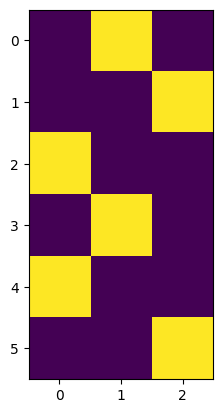

In [8]:
import matplotlib.pyplot as plt

plt.imshow(one_hot)

In [26]:
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self, num_classes, embedding_dim):
        super(SimpleModel, self).__init__()
        self.embedding = nn.Embedding(num_classes, embedding_dim)
        self.fc = nn.Linear(embedding_dim, 1)  # Example output layer

    def forward(self, x):
        embedding = self.embedding(x)
        x = self.fc(embedding)
        return x, embedding


# Instantiate and test the model
model = SimpleModel(num_classes=num_classes, embedding_dim=4)
output, embeddings = model(torch.tensor(df['category_index']).to(torch.int64))
print(output)
print()
print(embeddings)

tensor([[-1.1242],
        [ 0.0574],
        [-0.7675],
        [-1.1242],
        [-0.7675],
        [ 0.0574]], grad_fn=<AddmmBackward0>)

tensor([[-0.5776,  0.3355,  2.3085, -0.1005],
        [-0.0302,  0.7318, -1.4959, -0.7707],
        [-1.1924,  0.0649,  1.2808,  2.1736],
        [-0.5776,  0.3355,  2.3085, -0.1005],
        [-1.1924,  0.0649,  1.2808,  2.1736],
        [-0.0302,  0.7318, -1.4959, -0.7707]], grad_fn=<EmbeddingBackward0>)
